In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [41]:
# Import matrices
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.csv',
                 index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.all.csv',
                 index_col=0)

In [51]:
# Restrict to mutations that occur at least 10 times
frequent_mutations = list(patient_mutations.sum()[patient_mutations.sum() > 15]().index)
patient_affinities = patient_affinities.ix[:, frequent_mutations]

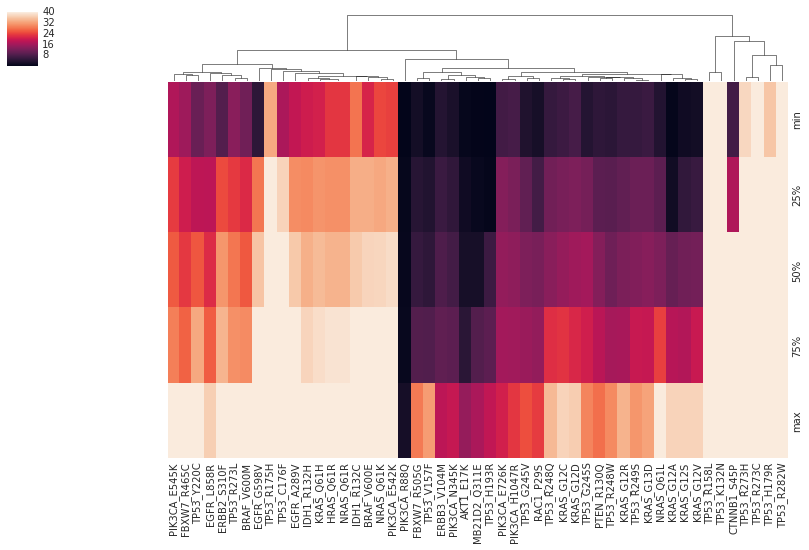

In [55]:
sns.clustermap(patient_affinities.describe().ix[3:9], 
               row_cluster=False, figsize=(14,8), vmax=40)

In [50]:
shape(patient_affinities)

(7137, 51)